# **Contexto** 

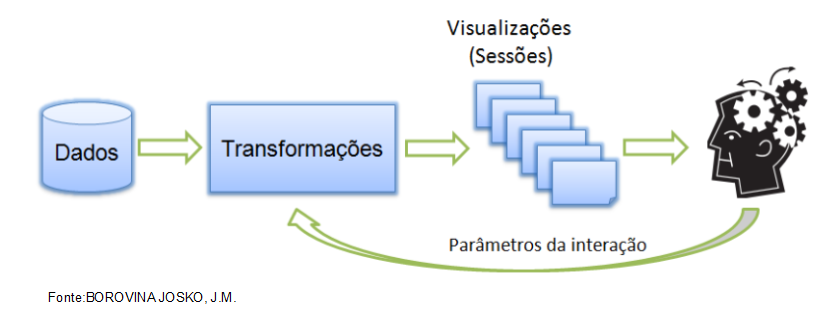

# **Data Transformation**

Refere-se ao processo de mutar as características dos dados para adequá-los ao acesso ou armazenamento. *Data transformation* é onipresente em *pipelines* (ETL, ELT, EtLT) responsáveis pela ingestão de dados em diferentes arquiteturas de Big Data (e.g., Data Warehouse, Data Lake, Data Mesh), preparação de datasets para análises diversas envolvendo *Machine Learning* ou Visualizações.

Outros processos importantes presentes em um *pipeline* são aqueles relacionados a **Integração de Dados** e **Qualidade de Dados** (fora do escopo dessa disciplina). A Integração de Dados remete a um conjunto de operações que integra dados (semanticamente iguais) de estruturas heterogêneas em uma única estrutura. Por sua vez, a Qualidade de Dados remete a um conjunto de operações que analisa e determina a qualidade dos dados e, com base nesse resultado, realiza a reparação do dados. 

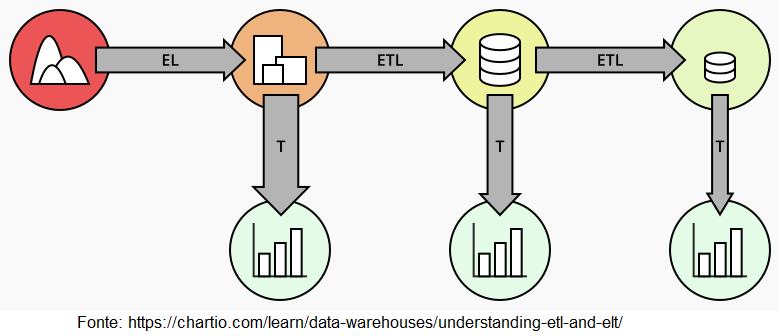

Um *pipeline* e suas mutações podem ser construído por ferramentas que demandam pouca programação (e.g., Hevo, Informatica Powercenter, Airbyte) ou ferramentas de *script* que permitem o seu desenvolvimento utilizando SQL, Python, Shell Script, principalmente.

As mutações podem ser classificadas nas seguintes classes:

**Organização**
> Remete a um conjunto de mutações que modificam o dado (para torná-lo mais organizado) ou criam novos dados. Algumas delas são: Agregações, Pivoteamento, Ordenação, Padronização, Normalização, Derivação, Discretização, Comparações, Junção, *Shapping*, dentre outras.

**Smoothing**
> Remete a um conjunto de mutações que removem (filtram) dados desnecessários, distorcidos ou com baixa qualidade.

**Separação de Dados**
> Remete a um conjunto de mutações que particionar os dados em diferentes porções. Aqui, dados pode referir-se a um dataset ou um atributo de um dataset.

**Generalização**
> Remete a um conjunto de mutações que transformam dados granulares em atributos de mais alta ordem utilizando o conceito de hierarquia.

# **Organização**

Abaixo apresentamos algumas das manipulações mais importantes no sentido de organizar os dados. Sendos eles:


*   Trecho 1.a - Comparações e Junções
*   Trecho 1.b e 1.c - Pivoteamento
*   Trecho 1.b e 1.d - Agrupamento
*   Trecho 1.b e 1.e - Discretização
*   Trecho 1.b e 1.f - Normalização
*   Trecho 1.b e 1.g - Smoothing

In [5]:
#--------------------
# Trecho 1a - Manipulação 
# Comparações: permite comparar dataframes por todos os atributos ou atributos específicos
# Junções: permite relacionar dois dataframes
#--------------------
import pandas as pd
import numpy as np

# Data Frame
vendasA = { 'produto': ['notebook','SSD','mouse','headset'],
            'preco_uni': [6900,500,40,350],
            'qtde': [1,1,3,2] 
           }
vendasA = pd.DataFrame(vendasA)

vendasB = { 'produto': ['notebook','HD','mouse','headset'],
            'preco_uni': [6900,500,45,1050],
            'qtde': [1,1,1,2]
           }
vendasB = pd.DataFrame(vendasB)

# -----------------------------
# COMPARAÇÕES entre data frames
# Comparação TOTAL (entre todos os atributos) entre dois data frames IDÊNTICOS em estrutura!
print ('\n Comparação TOTAL....\n')
print (vendasB.compare(vendasA))

# Comparação por ATRIBUTO ESPECÍFICO
print ('\n Comparação Atributo Específico....\n')
x = np.where(vendasA['produto'] == vendasB['produto'], 1, 0)
print(x.sum())

# -----------------------------
# JUNÇÃO entre data frames
# Pode ser em tempo de execução (JOIN) ou por meio da criação de um data frame (MERGE)

print ('\n Merge utilizando INNER JOIN....\n')
print (vendasA.merge(vendasB, how='inner', on='produto',suffixes=('_A', '_B')))

print ('\n Merge utilizando LEFT OUTER JOIN....\n')
print (vendasA.merge(vendasB, how='left', on='produto',suffixes=('_A', '_B')))

print ('\n Merge utilizando PRODUTO CARTESIANO....\n')
print (vendasA.merge(vendasB, how='cross', suffixes=('_A', '_B')))



 Comparação TOTAL....

  produto       preco_uni        qtde      
     self other      self  other self other
1      HD   SSD       NaN    NaN  NaN   NaN
2     NaN   NaN      45.0   40.0  1.0   3.0
3     NaN   NaN    1050.0  350.0  NaN   NaN

 Comparação Atributo Específico....

3

 Merge utilizando INNER JOIN....

    produto  preco_uni_A  qtde_A  preco_uni_B  qtde_B
0  notebook         6900       1         6900       1
1     mouse           40       3           45       1
2   headset          350       2         1050       2

 Merge utilizando LEFT OUTER JOIN....

    produto  preco_uni_A  qtde_A  preco_uni_B  qtde_B
0  notebook         6900       1       6900.0     1.0
1       SSD          500       1          NaN     NaN
2     mouse           40       3         45.0     1.0
3   headset          350       2       1050.0     2.0

 Merge utilizando PRODUTO CARTESIANO....

   produto_A  preco_uni_A  qtde_A produto_B  preco_uni_B  qtde_B
0   notebook         6900       1  notebook    

In [6]:
"""
# ------------
# Trecho 1.b - Manipulação de Arquivos Texto no Python
# Carga do Pydrive - API que facilita o acesso a arquivos no Google Drive
# Essa operação carrega um arquivo que está em um certo GDrive para a sua sessão GColab
# ------------
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Uma vez realizada a autenticação, carregamos para o COLAB corrente o arquivo informado
# Note que esse operação tornará o arquivo disponível na seção ARQUIVOS
# Ao encerrar a seção, este arquivo desaparece
downloaded = drive.CreateFile({'id':"1c0FiLWc3TftkY07nK4zx3WX5Ry-3hMfw"})   # replace the id with id of file you want to access
downloaded.GetContentFile('population.csv')

"""

'\n# ------------\n# Trecho 1.b - Manipulação de Arquivos Texto no Python\n# Carga do Pydrive - API que facilita o acesso a arquivos no Google Drive\n# Essa operação carrega um arquivo que está em um certo GDrive para a sua sessão GColab\n# ------------\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n#\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n\n# Uma vez realizada a autenticação, carregamos para o COLAB corrente o arquivo informado\n# Note que esse operação tornará o arquivo disponível na seção ARQUIVOS\n# Ao encerrar a seção, este arquivo desaparece\ndownloaded = drive.CreateFile({\'id\':"1c0FiLWc3TftkY07nK4zx3WX5Ry-3hMfw"})   # replace the id with id of file you want to access\ndownloaded.GetContentFile(\'population.csv\')\n\n'

In [7]:
#--------------------
# Trecho 1c - Manipulação 
# Pivoteamento: Permite transformar a disposição de um data.frame, isto é, transformar valores de colunas em linhas e vice-versa.
#--------------------
import pandas as pd

# É necessário executar o trecho 1.b!!!
fi = pd.read_csv('population.csv')
print("pedacinho...", fi.head)

# Filtra somente registros de certos paises
fiFiltered = fi[fi['Country Name'].str.lower().isin(['spain', 'brazil', 'croatia']) & (fi['Year'].isin([1980,1990,2000]))]

# Transforma em atributos os valores de um certo atributo. Demais atributos permanecem inalterados
filPiv = fiFiltered.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Value')
print (filPiv)

# Transforma os valores de certos atributos em linha. Demais atributos permanecem inalterados
filPiv = filPiv.reset_index() 
filPiv.columns = filPiv.columns.astype(str)
filPiv = filPiv.melt(id_vars=['Country Name', 'Country Code'], value_vars=['1980','1990','2000'], var_name='Coluna Nova', value_name='Value')
print ('\n')
print (filPiv)


pedacinho... <bound method NDFrame.head of       Country Name Country Code  Year      Value
0       Arab World          ARB  1960   92197753
1       Arab World          ARB  1961   94724510
2       Arab World          ARB  1962   97334442
3       Arab World          ARB  1963  100034179
4       Arab World          ARB  1964  102832760
...            ...          ...   ...        ...
15404     Zimbabwe          ZWE  2014   13586681
15405     Zimbabwe          ZWE  2015   13814629
15406     Zimbabwe          ZWE  2016   14030390
15407     Zimbabwe          ZWE  2017   14236745
15408     Zimbabwe          ZWE  2018   14439018

[15409 rows x 4 columns]>
Year                            1980       1990       2000
Country Name Country Code                                 
Brazil       BRA           120694009  149003223  174790340
Croatia      HRV             4599782    4777368    4468302
Spain        ESP            37491165   38867322   40567864


  Country Name Country Code Coluna Nova      

In [8]:
#--------------------
# Trecho 1d - Manipulação 
# Agregação: Permite agrupar um ou mais atributos de um dataframe
#--------------------
import pandas as pd
import numpy as np

# É necessário executar o trecho 1.b!!!
fi = pd.read_csv('population.csv')

# Filtra somente registros de certos paises
fiFiltered = fi[fi['Country Name'].str.lower().isin(['spain', 'brazil', 'croatia'])]
fiFiltered = fiFiltered[['Country Name','Year', 'Value']]

# Agrupamento - Tipo 1
fiAgrup = fiFiltered.groupby(['Country Name']).Value.mean()
print ('Agrupamento Tipo 1... \n', fiAgrup)

# Agrupamento - Tipo 2
fiAgrup = fiFiltered.groupby(['Year']).aggregate(['min', np.median, max, np.std])
print ('Agrupamento Tipo 2... \n', fiAgrup)

Agrupamento Tipo 1... 
 Country Name
Brazil     1.440819e+08
Croatia    4.436977e+06
Spain      3.909132e+07
Name: Value, dtype: float64
Agrupamento Tipo 2... 
         Value                                     
          min      median        max           std
Year                                              
1960  4140181  30455000.0   72179226  3.430912e+07
1961  4167292  30739250.0   74311343  3.541371e+07
1962  4196712  31023366.0   76514328  3.655802e+07
1963  4225675  31296651.0   78772657  3.773606e+07
1964  4252876  31609195.0   81064571  3.893208e+07
1965  4280923  31954292.0   83373530  4.013601e+07
1966  4310701  32283194.0   85696505  4.135031e+07
1967  4338683  32682947.0   88035814  4.256866e+07
1968  4365628  33113134.0   90387079  4.379196e+07
1969  4391490  33441054.0   92746614  4.503268e+07
1970  4412252  33814531.0   95113265  4.627581e+07
1971  4431275  34224490.0   97482920  4.751820e+07
1972  4450564  34604469.0   99859383  4.876868e+07
1973  4470161  34988947

C:\Users\danie\AppData\Local\Temp\ipykernel_23012\2204192058.py:20: FutureWarning: ['Country Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  fiAgrup = fiFiltered.groupby(['Year']).aggregate(['min', np.median, max, np.std])


In [9]:
#--------------------
# Trecho 1e - Manipulação 
# Discretização: Permite transformar valores contínuos em grupos de valores discretos
#--------------------
import pandas as pd
import numpy as np

# É necessário executar o trecho 1.b!!!
fi = pd.read_csv('population.csv')

# Filtra somente registros de certos paises
fiFiltered = fi[fi['Country Name'].str.lower().isin(['france', 'argentina', 'japan']) & (fi['Year'].isin([1980,1990,2000]))]

# Discretiza baseado no número de grupos desejados
fiFiltered['grupo_1'] = pd.qcut(fiFiltered['Value'], q=4)
fiFiltered['grupo_2'] = pd.qcut(fiFiltered['Value'], q=10, precision=0)
print (fiFiltered)
print('\n')
print ('Quantidade de elementos no GRUPO 1... \n', fiFiltered['grupo_1'].value_counts())
print ('Quantidade de elementos no GRUPO 2... \n', fiFiltered['grupo_2'].value_counts())

# Discretiza baseado no SEU critério
nomeGrupo = ['Baixo', 'Medio', 'Alta']
fiFiltered['nomeGrupo'] = pd.qcut(fiFiltered['Value'], q=[0, .3, .7, 1], labels=nomeGrupo)
print (fiFiltered)


     Country Name Country Code  Year      Value                     grupo_1  \
3147    Argentina          ARG  1980   27896528  (27896527.999, 36870787.0]   
3157    Argentina          ARG  1990   32618651  (27896527.999, 36870787.0]   
3167    Argentina          ARG  2000   36870787  (27896527.999, 36870787.0]   
6739       France          FRA  1980   55161527    (36870787.0, 58235697.0]   
6749       France          FRA  1990   58235697    (36870787.0, 58235697.0]   
6759       France          FRA  2000   60912500   (58235697.0, 116782000.0]   
8509        Japan          JPN  1980  116782000   (58235697.0, 116782000.0]   
8519        Japan          JPN  1990  123537000  (116782000.0, 126843000.0]   
8529        Japan          JPN  2000  126843000  (116782000.0, 126843000.0]   

                         grupo_2  
3147    (27896527.0, 31674226.0]  
3157    (31674226.0, 35169933.0]  
3167    (35169933.0, 44187083.0]  
6739    (44187083.0, 55776361.0]  
6749    (55776361.0, 58235697.0]  

C:\Users\danie\AppData\Local\Temp\ipykernel_23012\2385300197.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiFiltered['grupo_1'] = pd.qcut(fiFiltered['Value'], q=4)
C:\Users\danie\AppData\Local\Temp\ipykernel_23012\2385300197.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiFiltered['grupo_2'] = pd.qcut(fiFiltered['Value'], q=10, precision=0)
C:\Users\danie\AppData\Local\Temp\ipykernel_23012\2385300197.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [10]:
#--------------------
# Trecho 1f - Manipulação 
# Normalização: Permite transformar valores com alta variabilidade em escalas menores, favorecendo análises visuais e de ML
#--------------------
try:
    from sklearn import preprocessing as sk
except ModuleNotFoundError:
    get_ipython().system('pip install -U scikit-learn')

import pandas as pd

# É necessário executar o trecho 1.b!!!
fi = pd.read_csv('population.csv')

# Filtra somente registros de certos paises
fiFiltered = fi[fi['Country Name'].str.lower().isin(['france', 'peru', 'brazil']) & (fi['Year'].isin([1980,1990,2000]))]

# Normalização pode "reduzir" os valores para o intervalo entre 0 e 1 (denominado de MinMaxScaler)
# Segue a seguinte expressão: (x - x.min) / (x.max - x.min)
fi_array = np.array(fiFiltered['Value'])
fi_norm = sk.normalize([fi_array])
print('Valores normalizados....\n', fi_norm)

# Resolução "no braço"
min = fiFiltered['Value'].min()
dif = fiFiltered['Value'].max() - fiFiltered['Value'].min()
fiFiltered['normal'] = fiFiltered['Value'].apply(lambda x: (x-min)/dif) 
print(fiFiltered)
print('\n')

# Normalização utilizando LOG "aproxima" os dados da média
fiFiltered['valorLog'] = np.log2(fiFiltered['Value'])
print(fiFiltered)
print('\n')

     ---------------------------------------- 8.3/8.3 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 42.2/42.2 MB 4.3 MB/s eta 0:00:00


NameError: name 'sk' is not defined

In [1]:
#--------------------
# Trecho 1g - Smoothing
# Filtrando dados indesejáveis (outliers, não preenchidos) ou eliminando colunas
#--------------------

# É necessário executar o trecho 1.b!!!
fi = pd.read_csv('population.csv')
print ("COM outliers...", fi.describe())
print('\n')

# Determina Distância Interquartil e Limites Superior e Inferior
# Assumimos que ACIMA do quartil 95 ou abaixo do quartil 5 são indesejáveis
q95 = fi["Value"].quantile(0.95)
q05 = fi["Value"].quantile(0.05)
distInterQuartil = (q95 - q05)
limiteSup = q95 + (distInterQuartil * 1.5)
limiteInf = q05 - (distInterQuartil * 1.5)

# Identifica registros outliers
fiSemoutlier = np.where(fi["Value"] > limiteSup, True, np.where(fi["Value"] < limiteInf, True, False))
fi = fi.loc[~(fiSemoutlier)]
print ("SEM outliers...", fi.describe())

NameError: name 'pd' is not defined